# Machine Learning 
# Hailee Kiesecker 
# Spring 2021
# PS1



### Question 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import math

In [ ]:
# 1
iris = pd.read_csv('iris.csv', names=['sepal-length', 
                                       'sepal-width', 
                                       'petal-length', 
                                       'petal-width', 
                                       'type'])
iris.head(3)

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
# 2 scale the features 
# standardization / normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

features = ['sepal-length', 
             'sepal-width', 
             'petal-length', 
             'petal-width']

dep_feat = ['Iris-Setosa',
            'Iris-versicolor',
            'Iris-virginica']
ind_features = iris[features]

iris_s_pipe = Pipeline([
      ('standardize', StandardScaler()),
])
t = iris_s_pipe.fit(ind_features)
t2 = t.transform(ind_features)


In [ ]:
t_iris = pd.DataFrame(t2, columns = features)
t_iris.head()

,sepal-length,sepal-width,petal-length,petal-width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# 3
t_iris.corr() # correlation coefficent

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
t_iris.cov() # corevariance coefficent

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.006711,-0.110103,0.877605,0.823443
sepal-width,-0.110103,1.006711,-0.423338,-0.358937
petal-length,0.877605,-0.423338,1.006711,0.969219
petal-width,0.823443,-0.358937,0.969219,1.006711


In [ ]:
# Compute the PCA and show the principal components (their coefficients).
# similar - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# 4
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pc = pca_iris.fit_transform(t_iris)
pcDf = pd.DataFrame(data = pc
             , columns = ['pc1-length', 'pc2-width'])
df = pd.concat([pcDf, iris[['type']]], axis = 1)
df.head()
                          

,pc1-length,pc2-width,type
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [ ]:
# Compute the correlation coefficient between each original feature and the new features generated by the PCA
# assuming original is not normalized
# join iris with pcDf

# 5
df02 = df.merge(iris, left_on='type', right_on='type')
df02

,pc1-length,pc2-width,type,sepal-length,sepal-width,petal-length,petal-width
0,-2.264542,0.505704,Iris-setosa,5.1,3.5,1.4,0.2
1,-2.264542,0.505704,Iris-setosa,4.9,3.0,1.4,0.2
2,-2.264542,0.505704,Iris-setosa,4.7,3.2,1.3,0.2
3,-2.264542,0.505704,Iris-setosa,4.6,3.1,1.5,0.2
4,-2.264542,0.505704,Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
7495,0.959299,-0.022284,Iris-virginica,6.7,3.0,5.2,2.3
7496,0.959299,-0.022284,Iris-virginica,6.3,2.5,5.0,1.9
7497,0.959299,-0.022284,Iris-virginica,6.5,3.0,5.2,2.0
7498,0.959299,-0.022284,Iris-virginica,6.2,3.4,5.4,2.3


In [ ]:
df02.corr()

,pc1-length,pc2-width,sepal-length,sepal-width,petal-length,petal-width
pc1-length,1.000000e+00,-6.004717e-15,0.755529,-0.491059,0.937737,0.927776
pc2-width,-6.004717e-15,1.000000e+00,-0.043777,0.194357,-0.095718,-0.062143
sepal-length,7.555290e-01,-4.377718e-02,1.000000,-0.109369,0.871754,0.817954
sepal-width,-4.910587e-01,1.943575e-01,-0.109369,1.000000,-0.420516,-0.356544
petal-length,9.377369e-01,-9.571834e-02,0.871754,-0.420516,1.000000,0.962757
petal-width,9.277763e-01,-6.214314e-02,0.817954,-0.356544,0.962757,1.000000


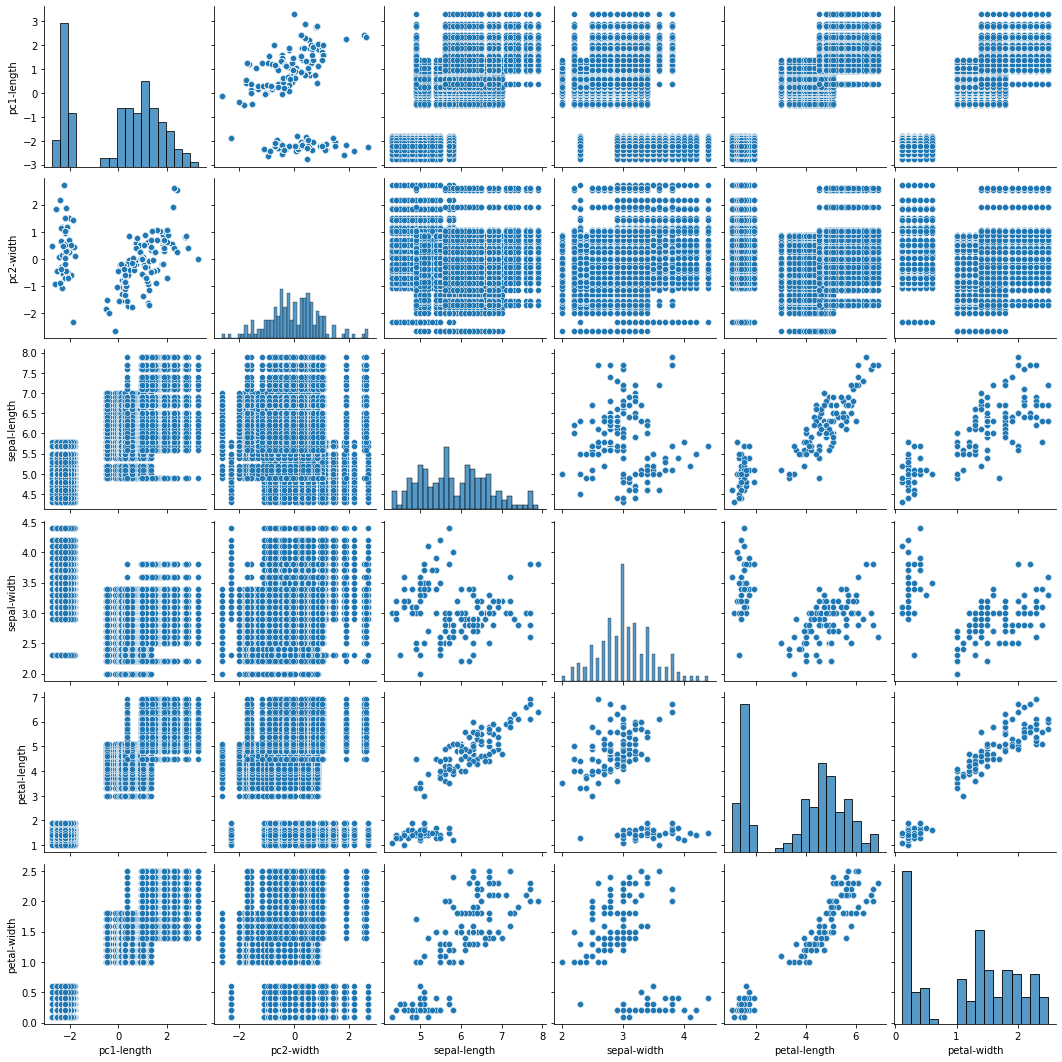

In [ ]:
sns.pairplot(df02) 

 ### Question 02

##### 1. What you can observe by comparing the results in subquestions 4 and 5 of Question1?

There appears to be a positive corrilation between PC1 width and PC2 length.

Which makes sense because speal with and length also has a positive correlation with echother along with a very strong positive correlation betwen petal width and length.

We can derive from this that using a PCA in this instance to limit how many features we have is valueable, and not totally overly expensive with what we are wanting to accomplish. If we limit this data set to only PC1-width and PC2-length it should be able to still be classified with those features. 


##### 2. Can you define any property?

After a lot of reading on PCA I have failed remember what a PCA property is. If we are going on basic knowlege about what we have discoved so far I would say a property would be length or width. But I feel this is an elementry and wrong statement to this question.


##### 3. If there is any property are you able to formally prove it? (5 extra pts)



### Question 3 (10 pts) (Scikit NOT Allowed)
##### Write a code in pure python, to create a decision tree (please show the results) - classification



In [ ]:
#sklearn just being used for toy_set not decision tree implementation
from sklearn.model_selection import train_test_split
test_y, train_x = train_test_split(df02, test_size=0.03)

In [ ]:
print(train_x.shape)
toy_set = train_x #our small data set to test the classificaiton tree
class_type = toy_set['type'].unique() 

header = class_type 

(225, 7)


walk through --https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

#### simple explaination of DS alg:

the data set is provided to the algorithm which then puts the data through a series of questions. which are currently customized to our data set through previous evaluation of the data. using gini and entropy gain we decide at which tree level the question is the most useful to create a leaf node. once nearly all of our data is split (classified) the tree is returned to us with their predicited classificaitons. 

the classification tree method takes in independent features, dependent features and then the dataset name. It will then recursivly call our best question method customized to the dataset. When an imporovement has been found, the gini and entropy as measurments. the classification tree method will then call our split. the split depending will make a leaf node, or it will create a new node that will ask another quesiton and the algorithm restarts

In [ ]:
# 1 - sum(P(x=k))^2
#Gini Index is calculated by subtracting 
#the sum of the
#squared probabilities of each class from one

def cc(rows):
    #how many of each type are there out of x
    return rows['type'].value_counts(normalize=False)
      
# numpy Ginx
def gini_index(rows):
    class_count = cc(rows) # est. 3
    num_rows = len(rows)
    imp = 1;
    total = 0;
    for x in class_count:
        total += x/num_rows #prob
    imp -= total**2 # minus one
    return imp 

In [ ]:
# probability of each case and multiply 
# it by the logarithm base 2 of the probability
# sum it together
# negate it

#scipy entropy
def entropy(rows):
    class_count = cc(rows)
    total = 0; 
    num_rows = len(rows)
    for x in class_count:
        prob = x/num_rows
        t = prob*math.log(prob,2)
        total += t
    return -(total)
        

In [ ]:
# leaf node should have a decision 
# type 1 type 2 or type 3
def leaf(rows):
    prediction
    cc = cc(rows)
    if len(cc) > 1:
        null#do nothing for now
    else:
        prediciton = cc(rows)

#will use mainly for display purposes 
def node(q, tb, fb):
    question = q
    true_b = tb
    false_b = fb
    

In [ ]:
#for question creation
#toy_set.groupby('type')['petal-width'].max()

In [ ]:
# question generator for between values of specific columns
class question:
    
    def __init__ (self, column, minv, maxv):
        self.column = column 
        self.minv = minv
        self.maxv = maxv

    def q(self, example):
        val = example[self.column]
        return val >= self.minv | val <= self.maxv
    
    def __repr__(self):
        condition = "between"
        filler = " and "
        return "Is %s between %s and %s" % (class_type[self.column], str(self.minv), str(self.maxv) )

    

In [ ]:
q = question(1, 2, 4)
q # 

Is Iris-setosa between 2 and 4

In [ ]:
#find the best question combination for tree seperation

# for each feature how do we get the best entropy 

def find_question(rows):
    uncert = gini_index(rows)
    n = len(rows[0]) - 1 
    b_entropy = 0 
    b_q 
    
    # for each feature 
    for c in range(n):
        values = set(row[c] for r in rows) # tiny set of just this column
        
        # for each row in column 
        for v in values: 
            #petal length
             question = question(c, 1, 1.9) # is

    # it was at this point during one of the worst flight experinces of her life that she gave up.           
    
    #==== for questions ====
    # "petal length"      
        # is = 1 - 1.9
        # ivc = 3 -5.1
        # iv = 4.5 -6.9
    # "sepal-length":
        # is = 4.3-5.8
        # ivc = 4.9-7.0 
        # iv = 4.9- 7.9
   # "petal-width":
        # is = 0.1 - 0.6
        # ivc = 1.0 - 1.8
        # iv = 1.4 - 2.5
    # "sepal-width":
        # is =  2.3 -4.0
        # ivc = 2.0 -3.3
        # iv = 2.2 -3.8
    

In [ ]:
# the question is whats the question
# partition on best possible question based on entropy gain
def split(rows, question):

    true_rows, false_rows = [], []
    # foreach row
    for row in rows:
        #if petal length is for iris virginica
        if question.q(row, 1, 1.9):
            true_rows.append(row)
        else:
            false_rows.append(row)
    
    
    return true_rows, false_rows



In [ ]:
def class_tree(independent, dependent, df):
    data = df
    cats = data[dependent]
    ind_feat = data[indpenedent]
    
    #when calling gain/index use dependent var
    
    entroupy = 0
    question = None 
    # call find_question 
    find_question(rows) # -- return entropy and question

    # if nothing more can be done
    if entropy == 0:
        return Leaf(rows)
    tr, fr = split(rows, question)
    tb = class_tree(tr) #call recursion on true side (will become leaf)
    fb = class_tree(fr) #call recursion on false side
    
    return Node(question, tb, fb) # for visualization later

In [ ]:
# class tree can be stored as a var and then each node can be printed

def show(ct):
    if isinstance(node, Leaf):
        print("prediction" , node.prediction)
        return 
    
    print(str(node.question))